In [2]:
%load_ext autoreload
%autoreload 2

In [9]:
import climetlab as cml
import climetlab_s2s_ai_challenge

In [11]:
def fix_dataset_dims(d):
    day_of_year = d.forecast_time[0].dt.dayofyear.data.item()

    new_d = d.expand_dims("forecast_dayofyear").assign_coords(
        forecast_dayofyear=[day_of_year]
    )
    new_d = new_d.assign_coords(forecast_year=new_d.forecast_time.dt.year).swap_dims(
        forecast_time="forecast_year"
    )

    dims = set(new_d.dims)
    dims.difference_update(
        ("forecast_dayofyear", "forecast_year", "latitude", "longitude")
    )

    new_d = new_d.transpose(
        "forecast_year", "forecast_dayofyear", *dims, "latitude", "longitude"
    )

    return new_d

# First surprise

In [40]:
cmlds = cml.load_dataset("s2s-ai-challenge-training-output-reference",
                         date = 20200220,
                         parameter='tp'                         
                       )

xrds = fix_dataset_dims(cmlds.to_xarray())

  0%|          | 0/1 [00:00<?, ?it/s]

tp-20200220.nc:   0%|          | 0.00/104M [00:00<?, ?B/s]

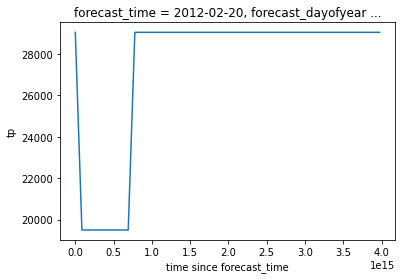

In [41]:
xrds.sel(forecast_year=2012).isnull().sum(dim=['latitude', 'longitude']).tp.plot()

Numer of null values increases after a certain lead time. 
I think there are many cases of this in the dataset.

Here is an example of correct lead time.

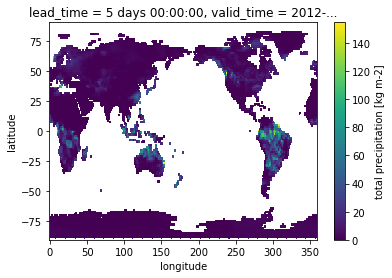

In [43]:
xrds.sel(forecast_year=2012).isel(lead_time=5).tp.plot()

Lead time 20 has only nulls.

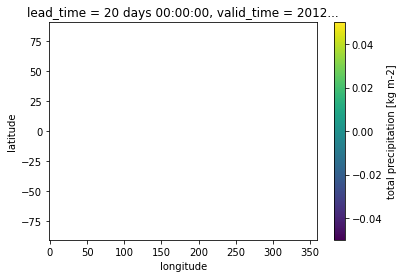

In [42]:
xrds.sel(forecast_year=2012).isel(lead_time=20).tp.plot()

# Second surprise

In [12]:
cmlds = cml.load_dataset("s2s-ai-challenge-training-output-reference",
                         date = 20200326,
                         parameter='tp'                         
                       )

xrds = fix_dataset_dims(cmlds.to_xarray())

  0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
xrds.forecast_dayofyear

<xarray.DataArray 'forecast_dayofyear' (forecast_dayofyear: 1)>
array([86])
Coordinates:
  * forecast_dayofyear  (forecast_dayofyear) int64 86

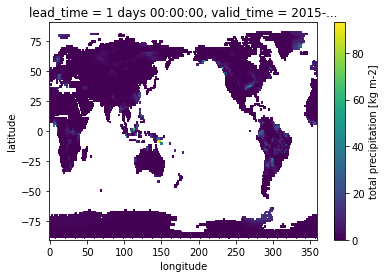

In [29]:
xrds.isel(lead_time=1).sel(forecast_year=2015, forecast_dayofyear=86).tp.plot()

Note the gap inside of Africa. 
I saw different gaps of differents sizes in that same region.